In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import load_img,img_to_array

In [3]:
drive.mount('/content/drive',force_remount=True)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/CNN_10fruit/train',
                                               target_size=(128,128),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/CNN_10fruit/test',
                                               target_size=(128,128),
                                               batch_size=32,
                                               class_mode ='categorical')

Mounted at /content/drive
Found 100 images belonging to 10 classes.
Found 30 images belonging to 10 classes.


In [4]:
model=Sequential()

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation='Softmax'))


model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(train,
                  steps_per_epoch=len(train),
                  batch_size = 32,
                  epochs=50,
                  validation_data=test,
                  validation_steps=len(test),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/50
4/4 [==============================] - 38s 11s/step - loss: 3.2729 - accuracy: 0.0800 - val_loss: 2.3683 - val_accuracy: 0.1333
Epoch 2/50
4/4 [==============================] - 8s 2s/step - loss: 2.3764 - accuracy: 0.0500 - val_loss: 2.3818 - val_accuracy: 0.1000
Epoch 3/50
4/4 [==============================] - 8s 2s/step - loss: 2.3276 - accuracy: 0.1400 - val_loss: 2.3535 - val_accuracy: 0.1000
Epoch 4/50
4/4 [==============================] - 8s 2s/step - loss: 2.2107 - accuracy: 0.1700 - val_loss: 2.4722 - val_accuracy: 0.1000
Epoch 5/50
4/4 [==============================] - 8s 2s/step - loss: 2.1835 - accuracy: 0.2000 - val_loss: 2.4301 - val_accuracy: 0.0333
Epoch 6/50
4/4 [==============================] - 8s 2s/step - loss: 2.0997 - accuracy: 0.2900 - val_loss: 2.5366 - val_accuracy: 0.2000
Epoch 7/50
4/4 [==============================] - 9s 2s/step - loss: 1.9617 - accuracy: 0.2900 - val_loss: 2.6854 - val_accuracy: 0.0000e+00
Epoch 8/50
4/4 [===================

In [6]:
model.save('CNN_10fruit.h5')

In [ ]:
label = ['Orange','Strawberry','Watermelon','Grape','Durian','Dragon fruit','Mango','Avocado','Banana','Apple']

Test loss=  13.486824989318848
Test accuracy=  0.03333333507180214


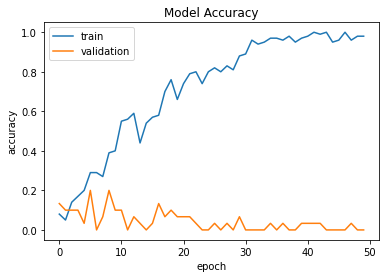

In [7]:

score = model.evaluate(test,verbose=0)
print('Test loss= ',score[0])
print('Test accuracy= ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

Watermelon


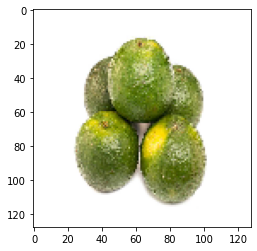

In [ ]:

img = load_img('/content/Dataset_10fruit_test/cam/1.jpg', target_size = (128,128))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,128,128,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])